<a href="https://colab.research.google.com/github/bundickm/DS-Unit-2-Sprint-2-Regression/blob/master/module4-decision-trees/LS_DS_411A_Decision_Trees_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science — Tree Ensembles_ 

# Decision Trees Assignment

## Part 1: House Price Regression

Apply decision trees to the Ames housing dataset you've worked with this week!

- Try multiple features
- Try features you've engineered
- Try different `max_depth` paramaters
- What's the best Test Root Mean Squared Error you can get? *Share with your cohort on Slack!*
- What's a cool visualization you can make? *Share with your cohort on Slack!*

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from ipywidgets import interact
import graphviz
from IPython.display import display

In [9]:
#Copy and paste code for importing and basic cleaning on the ames data
pd.set_option('max_columns', 100)
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df = df.dropna(subset=['GarageYrBlt','MasVnrArea'])
cat_vals = {'Gd':4, 'TA':2, 'Ex':5, 'Fa':3, np.NaN:0,'Po':1}
df['BsmtQual'] = df['BsmtQual'].replace(cat_vals)
df['ExterQual'] = df['ExterQual'].replace(cat_vals)
df['PoolQC'] = df['PoolQC'].replace(cat_vals)
df['HeatingQC'] = df['HeatingQC'].replace(cat_vals)
df['KitchenQual'] = df['KitchenQual'].replace(cat_vals)
df['FireplaceQu'] = df['FireplaceQu'].replace(cat_vals)
df['GarageQual'] = df['GarageQual'].replace(cat_vals)
df['ExterCond'] = df['ExterCond'].replace(cat_vals)
df['BsmtCond'] = df['BsmtCond'].replace(cat_vals)
df['GarageCond'] = df['GarageCond'].replace(cat_vals)
df['GarageFinish'] = df['GarageFinish'].replace({'Fin':2,'RFn':1,np.NaN:0,'Unf':-1})
df['PavedDrive'] = df['PavedDrive'].replace({'Y':1,'P':0,'N':-1})
df['LandSlope'] = df['LandSlope'].replace({'Gtl':3,'Mod':2,'Sev':1})
df['CentralAir'] = df['CentralAir'].replace({'Y':1,'N':0})
df['Electrical'] = df['Electrical'].replace({'SBrkr':3,'FuseA':2,'FuseF':1,'FuseP':0,'Mix':2.5,np.NaN:2.5})
df['Foundation'] = df['Foundation'].replace({'Slab':5,'PConc':4,'CBlock':3,'Stone':2,'BrkTil':1,'Wood':0})
df['Street'] = df['Street'].replace({'Grvl':0,'Pave':1})
df['LandContour'] = df['LandContour'].replace({'Lvl':3,'Bnk':2,'HLS':1,'Low':0})
df['LotShape'] = df['LotShape'].replace({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
df['ln_SalePrice'] = np.log(df['SalePrice'])
df = df[df.describe().columns]

df.head(1)

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,ln_SalePrice
0,1,60,65.0,8450,1,3,3,3,7,5,2003,2003,196.0,4,2,706,0,150,856,5,1,3.0,856,854,0,1710,1,0,2,1,3,1,8,0,0,2003.0,1,2,548,2,2,1,0,61,0,0,0,0,0,2,2008,208500,12.247694


R^2 Score: 0.6754105471407067


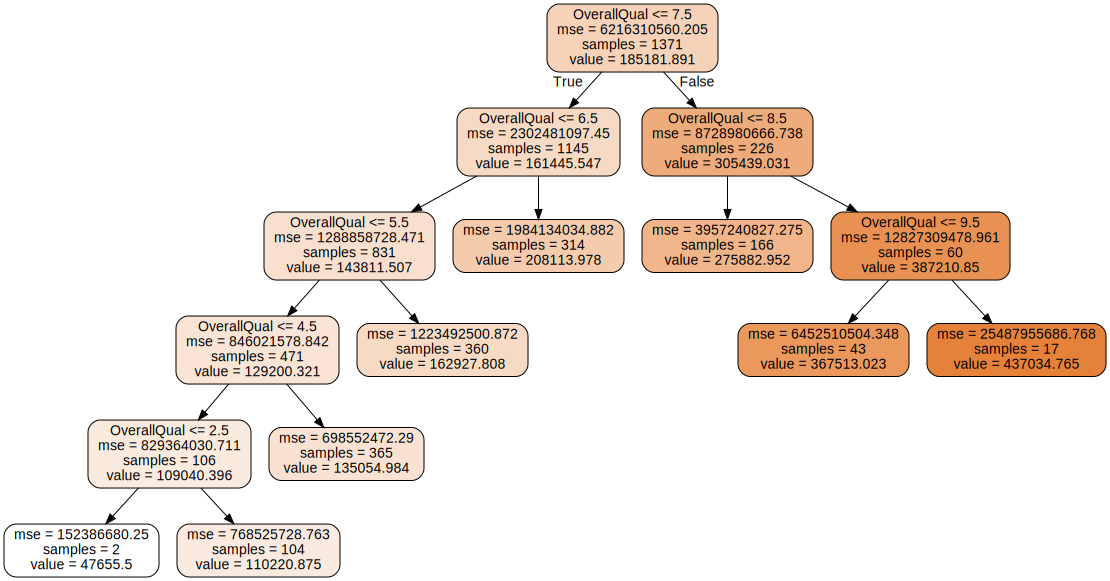

In [10]:
def viztree(decision_tree, feature_names):
  """Visualize a decision tree"""
  dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, 
                             filled=True, rounded=True)   
  return graphviz.Source(dot_data)
  
#mod lecture code to be universal and spit out only the tree
def tree_disp(X,y,features,depth=3):
  tree = DecisionTreeRegressor(max_depth=depth)
  tree.fit(X,y)
  print('R^2 Score:', tree.score(X, y))
  display(viztree(tree, feature_names=features))

#Test with a single feature and varying depths
features=['OverallQual']
tree_disp(df[features],df['SalePrice'],features,depth=5)

R^2 Score: 0.784482611263783


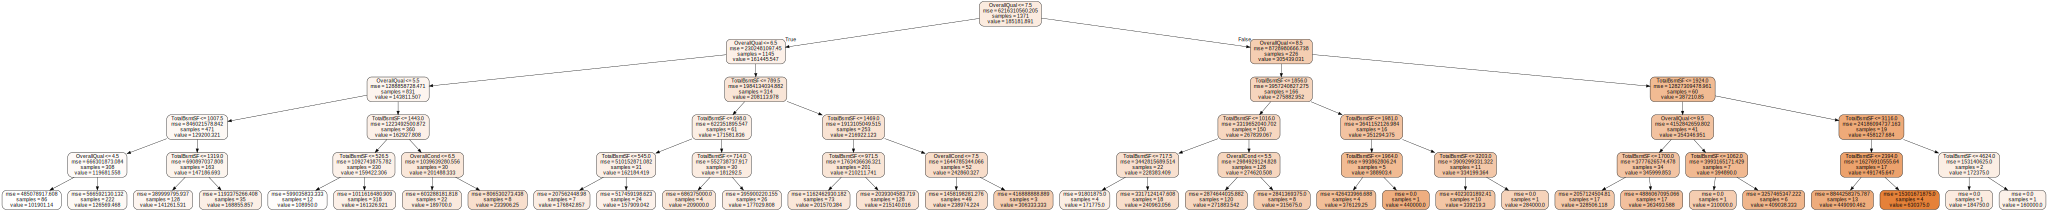

In [11]:
#multiple features R^2 is better, no surprise
features=['OverallQual','OverallCond','TotalBsmtSF']
tree_disp(df[features],df['SalePrice'],features,depth=5)

In [0]:
#Add in engineered features
df['TotalBath'] = (df['FullBath'] + (.5*df['HalfBath']))
df = df[df['TotalBath'] != 0]
df['BedBathRatio'] = df['BedroomAbvGr']/df['TotalBath']
df['TotalLivSpace'] = df['GrLivArea']+df['TotalBsmtSF']

R^2 Score: 0.8605357056110416


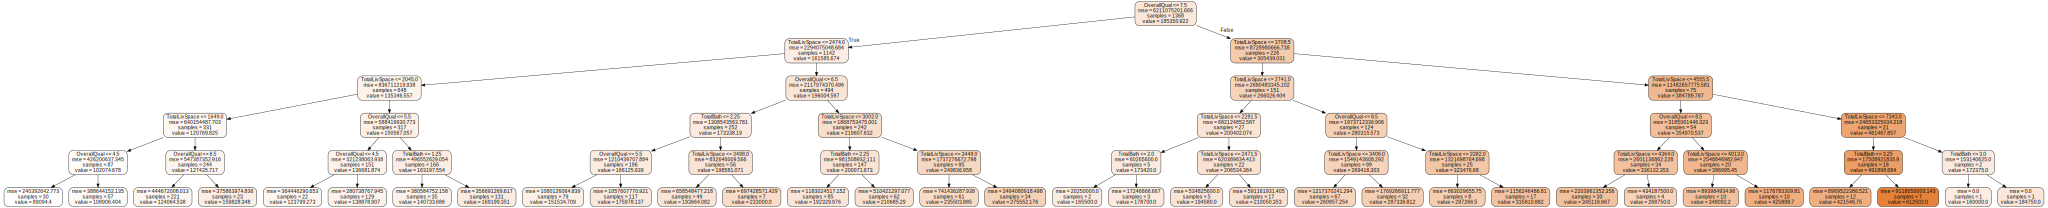

In [13]:
#Same number of features but some are engineered
#R^2 goes up another .10 points
features=['OverallQual','TotalLivSpace','TotalBath']
tree_disp(df[features],df['SalePrice'],features,depth=5)

R^2 Score: 0.8268483313035563


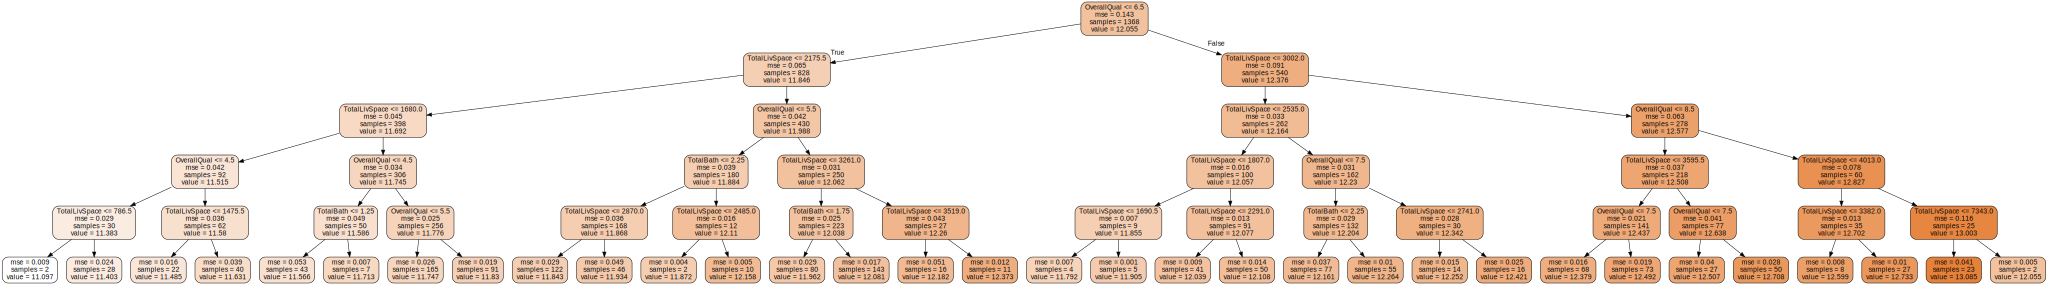

In [14]:
#Same features but log(y), resulted in a decrease
features=['OverallQual','TotalLivSpace','TotalBath']
tree_disp(df[features],np.log(df['SalePrice']),features,depth=5)

## Part 2 / Stretch: "Play Tennis" Classification

We'll reproduce the "Play Tennis" example from Ross Quinlan's 1986 paper, [Induction of Decison Trees](https://link.springer.com/content/pdf/10.1007%2FBF00116251.pdf).

[According to Wikipedia](https://en.wikipedia.org/wiki/Ross_Quinlan), "John Ross Quinlan is a computer science researcher in data mining and decision theory. He has contributed extensively to the development of decision tree algorithms, including inventing the canonical C4.5 and ID3 algorithms."

#### "Table 1 shows a small training set"

In [15]:
import pandas as pd

columns = 'No. Outlook Temperature Humidity Windy PlayTennis'.split()

raw = """1 sunny hot high false N
2 sunny hot high true N
3 overcast hot high false P
4 rain mild high false P
5 rain cool normal false P
6 rain cool normal true N
7 overcast cool normal true P
8 sunny mild high false N
9 sunny cool normal false P
10 rain mild normal false P
11 sunny mild normal true P
12 overcast mild high true P
13 overcast hot normal false P
14 rain mild high true N"""

data = [row.split() for row in raw.split('\n')]
tennis = pd.DataFrame(data=data, columns=columns).set_index('No.')
tennis['PlayTennis'] = (tennis['PlayTennis'] == 'P').astype(int)

tennis

,Outlook,Temperature,Humidity,Windy,PlayTennis
No.,,,,,
1,sunny,hot,high,false,0
2,sunny,hot,high,true,0
3,overcast,hot,high,false,1
4,rain,mild,high,false,1
5,rain,cool,normal,false,1
6,rain,cool,normal,true,0
7,overcast,cool,normal,true,1
8,sunny,mild,high,false,0
9,sunny,cool,normal,false,1


#### "A decision tree that correctly classifies each object in the training set is given in Figure 2."

<img src="https://i.imgur.com/RD7d0u0.png" height="300">

In this dataset, the tennis player decided to play on 64% of the days, and decided not to on 36% of the days.

In [16]:
tennis['PlayTennis'].value_counts(normalize=True) * 100

1    64.285714
0    35.714286
Name: PlayTennis, dtype: float64

The tennis player played on 100% of the overcast days, 40% of the sunny days, and 60% of the  rainy days

In [17]:
tennis.groupby('Outlook')['PlayTennis'].mean() * 100

Outlook
overcast    100.0
rain         60.0
sunny        40.0
Name: PlayTennis, dtype: float64

On sunny days, the tennis player's decision depends on the humidity. (The Outlook and Humidity features interact.)

In [18]:
sunny = tennis[tennis['Outlook']=='sunny']
sunny.groupby('Humidity')['PlayTennis'].mean() * 100

Humidity
high        0
normal    100
Name: PlayTennis, dtype: int64

On rainy days, the tennis player's decision depends on the wind. (The Outlook and Windy features interact.)

In [19]:
rainy = tennis[tennis['Outlook']=='rain']
rainy.groupby('Windy')['PlayTennis'].mean() * 100

Windy
false    100
true       0
Name: PlayTennis, dtype: int64

#### Before modeling, we will ["encode" categorical variables, using pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html?highlight=get_dummies#computing-indicator-dummy-variables)

In [20]:
y = tennis['PlayTennis']
X = pd.get_dummies(tennis.drop(columns='PlayTennis'))
X

,Outlook_overcast,Outlook_rain,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
No.,,,,,,,,,,
1,0,0,1,0,1,0,1,0,1,0
2,0,0,1,0,1,0,1,0,0,1
3,1,0,0,0,1,0,1,0,1,0
4,0,1,0,0,0,1,1,0,1,0
5,0,1,0,1,0,0,0,1,1,0
6,0,1,0,1,0,0,0,1,0,1
7,1,0,0,1,0,0,0,1,0,1
8,0,0,1,0,0,1,1,0,1,0
9,0,0,1,1,0,0,0,1,1,0


## Train a Decision Tree Classifier
Get a score of 100% (accuracy)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [26]:
#score of 100% is possible at depth 4 which corresponds with the tree in figure2
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X,y)
print('Accuracy:',tree.score(X,y))

Accuracy: 1.0


## Compare to Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [31]:
from sklearn.linear_model import LogisticRegression

#All the solvers seem to solve it to 100% accuracy without issue
#Not surprising with how simple the data set is
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X,y)
print('Accuracy:',tree.score(X,y))

Accuracy: 1.0


## Visualize the tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

R^2 Score: 1.0


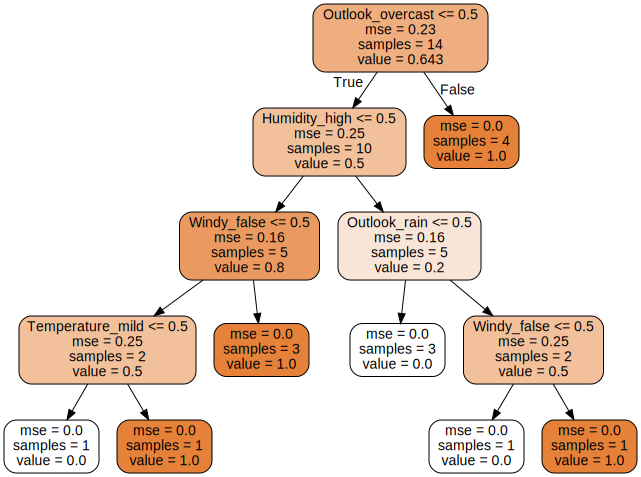

In [33]:
def class_tree_disp(X,y,features,depth=3):
  tree = DecisionTreeClassifier(max_depth=depth)
  tree.fit(X,y)
  print('R^2 Score:', tree.score(X, y))
  display(viztree(tree, feature_names=features))

#Test with a single feature and varying depths
features=X.columns
tree_disp(X,y,features,depth=4)